**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize_scalar
from scipy.optimize import fsolve
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import examproject
from examproject import ProblemOne

model1=ProblemOne()

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

We have understood the question, to check if any combination of prices $p1$ and $p2$ in 'linspace(0.1,2.0,10)' clear the labor- good 1- and good 2 market. We have therefor set up functions in 'examproject.py', calculating the clearing conditions difference from 0 (their clearing error) for each condition and at each potential price combination.

In [2]:
p1_val = np.linspace(0.1, 2.0, 10) #Setting up a range with potential p1 values, as given by the assignment
p2_val = np.linspace(0.1, 2.0, 10) #Setting up a range with potential p2 values, as given by the assignment

#Creating empty lists for the error (difference in clearing condition from 0) which will be appended using for-loop
error_labor_clearing = []
error_good1_clearing = []
error_good2_clearing = []

#Forloop appending calculating the error for each of the clearing conditions, for all combinations of p1 and p2.
for p1 in p1_val:
    for p2 in p2_val:
        error_labor = model1.market_clearing_errors(p1, p2)[0]
        good1_error = model1.market_clearing_errors(p1, p2)[1]
        good2_error = model1.market_clearing_errors(p1, p2)[2]
        error_labor_clearing.append({'p1': p1, 'p2': p2, 'error': error_labor})
        error_good1_clearing.append({'p1': p1, 'p2': p2, 'error': good1_error})
        error_good2_clearing.append({'p1': p1, 'p2': p2, 'error': good2_error})

#Turning the lists containing the error terms into dataframes for presentation
df_labor_error = pd.DataFrame(error_labor_clearing)
df_good1_error = pd.DataFrame(error_good1_clearing)
df_good2_error = pd.DataFrame(error_good2_clearing)

#Creating sorted lists from aforementioned dataframes, depending on 'error's difference from zero (ascending)
error_labor_clearing_sorted = sorted(error_labor_clearing, key=lambda x: abs(x['error']))
error_good1_clearing_sorted = sorted(error_good1_clearing, key=lambda x: abs(x['error'])) 
error_good2_clearing_sorted = sorted(error_good2_clearing, key=lambda x: abs(x['error'])) 

#Turning the sorted lists into dataframes for presentation
df_labor_error_sorted = pd.DataFrame(error_labor_clearing_sorted)
df_good1_error_sorted = pd.DataFrame(error_good1_clearing_sorted)
df_good2_error_sorted = pd.DataFrame(error_good2_clearing_sorted)

print('Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the labor market,')
print(' as the error in clearing condition is closest to 0')
display(df_labor_error_sorted[0:10])
print('Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the market for good 1,')
print(' as the error in clearing condition is closest to 0')
display(df_good1_error_sorted[0:10])
print('Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the market for good 2,')
print(' as the error in clearing condition is closest to 0')
display(df_good2_error_sorted[0:10])

Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the labor market,
 as the error in clearing condition is closest to 0


,p1,p2,error
0,1.155556,1.366667,-0.008482
1,1.366667,1.155556,-0.008482
2,1.788889,0.100000,-0.010592
3,0.100000,1.788889,-0.010592
4,0.311111,1.788889,-0.036577
5,1.788889,0.311111,-0.036577
6,0.733333,1.577778,0.044376
7,1.577778,0.733333,0.044376
8,1.577778,0.944444,-0.061808
9,0.944444,1.577778,-0.061808


Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the market for good 1,
 as the error in clearing condition is closest to 0


,p1,p2,error
0,0.944444,1.366667,-0.005856
1,0.944444,1.155556,0.027034
2,0.944444,1.577778,-0.045184
3,1.155556,2.000000,0.049498
4,0.944444,0.944444,0.053793
5,0.944444,0.733333,0.074727
6,0.733333,0.100000,-0.080599
7,0.733333,0.311111,-0.086794
8,0.944444,0.522222,0.090114
9,0.944444,1.788889,-0.091237


Below is a table with the 10 combinations of p1 and p2, which are the closest to clearing the market for good 2,
 as the error in clearing condition is closest to 0


,p1,p2,error
0,0.100000,1.366667,-0.000420
1,1.788889,1.788889,0.008304
2,0.311111,1.366667,-0.008831
3,1.366667,1.577778,-0.022463
4,0.522222,1.366667,-0.025995
5,1.155556,1.577778,0.026275
6,0.733333,1.366667,-0.052132
7,2.000000,1.788889,-0.060413
8,0.944444,1.577778,0.066221
9,1.577778,1.788889,0.068521


From above tables, we can see, that some price combinations are very close to clearing the three respective markets ($error = 0$ if rounded to 1 decimal). 

From the created DataFrames, we can illustrate which price combinations clear the respective clearing conditions using heatmaps.

Below is heatmap of clearing errors in the labor market for given p1 and p2. The closer the error is to 0, the closer to market clearing


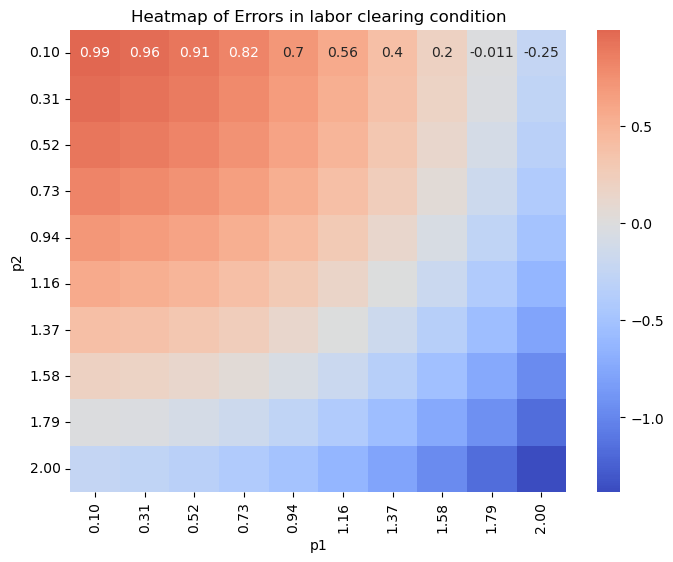

Below is heatmap of clearing errors in the market for good 1 for given p1 and p2. The closer the error is to 0, the closer to market clearing


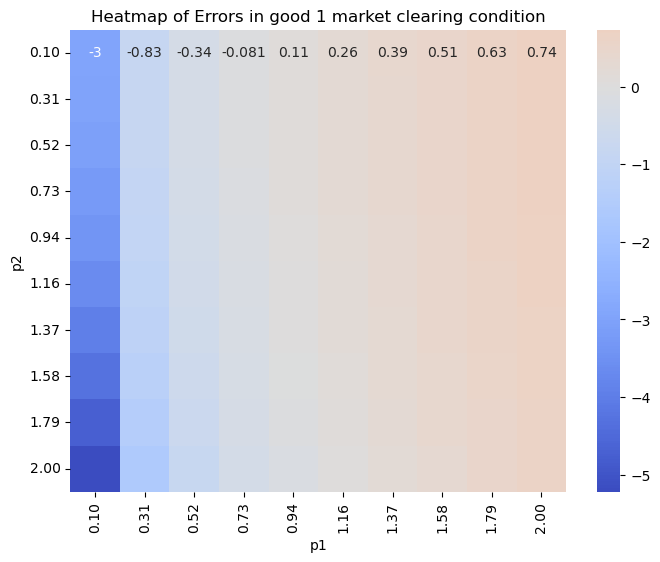

Below is heatmap of clearing errors in the market for good 2 for given p1 and p2. The closer the error is to 0, the closer to market clearing


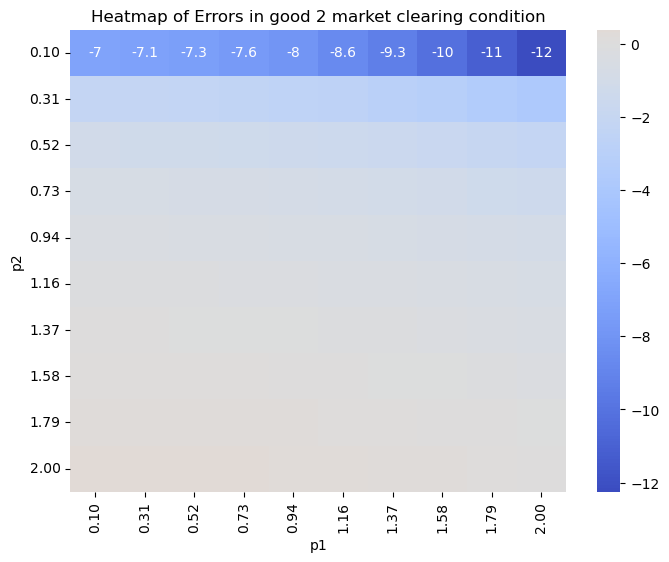

In [3]:
# Pivot the DataFrame to have p1 as columns (x-axis on heatmap), p2 as index (y-axis on heatmap), and error as values
df_pivot_labor = df_labor_error_sorted.pivot(index='p2', columns='p1', values='error')
df_pivot_good1 = df_good1_error_sorted.pivot(index='p2', columns='p1', values='error')
df_pivot_good2 = df_good2_error_sorted.pivot(index='p2', columns='p1', values='error')

print('Below is heatmap of clearing errors in the labor market for given p1 and p2. The closer the error is to 0, the closer to market clearing')
# Creating the heatmap for the labor clearing condition: axl
plt.figure(figsize=(8, 6))
axl = sns.heatmap(df_pivot_labor, annot=True, cmap="coolwarm", center=0)
# Setting labels and title
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Heatmap of Errors in labor clearing condition')
# formatting axis to only show 2 decimals
axl.set_xticklabels([f'{float(label.get_text()):.2f}' for label in axl.get_xticklabels()])
axl.set_yticklabels([f'{float(label.get_text()):.2f}' for label in axl.get_yticklabels()])
# Display the heatmap
plt.show()

print('Below is heatmap of clearing errors in the market for good 1 for given p1 and p2. The closer the error is to 0, the closer to market clearing')
# Creating the heatmap for the good 1 market clearing condition: ax1
plt.figure(figsize=(8, 6))
ax1 = sns.heatmap(df_pivot_good1, annot=True, cmap="coolwarm", center=0)
# Setting labels and title
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Heatmap of Errors in good 1 market clearing condition')
# formatting axis to only show 2 decimals
ax1.set_xticklabels([f'{float(label.get_text()):.2f}' for label in ax1.get_xticklabels()])
ax1.set_yticklabels([f'{float(label.get_text()):.2f}' for label in ax1.get_yticklabels()])
# Display the heatmap
plt.show()

print('Below is heatmap of clearing errors in the market for good 2 for given p1 and p2. The closer the error is to 0, the closer to market clearing')
# Creating the heatmap for the good 2 market clearing condition: ax1
plt.figure(figsize=(8, 6))
ax2 = sns.heatmap(df_pivot_good2, annot=True, cmap="coolwarm", center=0)
# Setting labels and title
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Heatmap of Errors in good 2 market clearing condition')
# formatting axis to only show 2 decimals
ax2.set_xticklabels([f'{float(label.get_text()):.2f}' for label in ax2.get_xticklabels()])
ax2.set_yticklabels([f'{float(label.get_text()):.2f}' for label in ax2.get_yticklabels()])
# Display the heatmap
plt.show()

In above heatmaps we can see, that the labor market clears at smaller values of $p2$, when $p1$ increases, We also see, that the clearing condition for good 1 is mostly depended on $p1$ (Clears around $p1 = 0,73$) and the clearing condition for good 2 is mostly depended on $p2$ (clears around $p2 = 1,58$)

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

Using Walras' law, we know that if prices clear 2 out of the 3 clearing conditions, they will clear all three. We will however check all three potential 2 equation systems, using fsolve.

Market clearing definitions for all combinations of 2 out of the 3 markets have been defined in 'examproject.py' and these are called to be solved using the root solver fsolve:

In [4]:
in_guess = [1, 1] # setting initial guess for the root solver (fsolve) used to find the equilibrium prices
eq_prices_l_1 = fsolve(model1.market_clearing_l_1, in_guess) # using fsolve to find p1 and p2 which clear both the labor- and good 1 market
#printing results
print('Solving on the labor- and good 1 conditions, we get:')
print(f'Equilibrium prices: p1 = {eq_prices_l_1[0]}, p2 = {eq_prices_l_1[1]}')

#eventhough above has solved the question through Walras' law, 
#we will still check the results when clearing labor- and good 2 market and good 1- and good 2 markets:

in_guess_2 = [0.5, 1] # setting initial guess for the root solver (fsolve) used to find the equilibrium prices
eq_prices_l_2 = fsolve(model1.market_clearing_l_2, in_guess_2) # using fsolve to find p1 and p2 which clear both the labor- and good 2 market
#printing results
print('Solving on the labor- and good 2 conditions, we get:')
print(f'Equilibrium prices: p1 = {eq_prices_l_2[0]}, p2 = {eq_prices_l_2[1]}')

in_guess_3 = [1, 0.5] # setting initial guess for the root solver (fsolve) used to find the equilibrium prices
eq_prices_1_2 = fsolve(model1.market_clearing_1_2, in_guess_3)# using fsolve to find p1 and p2 which clear both the good 1 and good 2 market
#printing results
print('Solving on the good 1- and good 2 conditions, we get:')
print(f'Equilibrium prices: p1 = {eq_prices_1_2[0]}, p2 = {eq_prices_1_2[1]}')


Solving on the labor- and good 1 conditions, we get:
Equilibrium prices: p1 = 0.9759306910499751, p2 = 1.4907587549209786
Solving on the labor- and good 2 conditions, we get:
Equilibrium prices: p1 = 0.9759306910499659, p2 = 1.4907587549222943
Solving on the good 1- and good 2 conditions, we get:
Equilibrium prices: p1 = 0.9759306910483289, p2 = 1.4907587549190537


In [5]:
# Printing the economy at equilibrium
print('Equilibrium of the economy:')
print('good 1 produced/sold:', model1.output_opt(eq_prices_l_1[0]))
print('good 1 price:', eq_prices_l_1[0])
print('good 2 produced/sold:', model1.output_opt(eq_prices_l_1[1]))
print('good 2 price:', eq_prices_l_1[1])
print('Profit firm 1:', model1.profit_opt(eq_prices_l_1[0]))
print('Profit firm 2:', model1.profit_opt(eq_prices_l_1[1]))
print('Labor 1:', model1.labor_opt(eq_prices_l_1[0]))
print('Labor 2:', model1.labor_opt(eq_prices_l_1[1]))
print('Labor supply:', model1.labor_opt(eq_prices_l_1[0])+ model1.labor_opt(eq_prices_l_1[1]))
print('Consumer utility:', model1.utility(model1.output_opt(eq_prices_l_1[0]), model1.output_opt(eq_prices_l_1[1]), model1.labor_opt(eq_prices_l_1[0])+ model1.labor_opt(eq_prices_l_1[1])))

Equilibrium of the economy:
good 1 produced/sold: 0.48796534552498755
good 1 price: 0.9759306910499751
good 2 produced/sold: 0.7453793774604893
good 2 price: 1.4907587549209786
Profit firm 1: 0.2381101784333205
Profit firm 2: 0.5555904163433866
Labor 1: 0.2381101784333205
Labor 2: 0.5555904163433866
Labor supply: 0.7937005947767071
Consumer utility: -0.5876233477874433


We see, that all equilibrium checks yield the same prices and know that market equilibrium happen at $p1 = 0,98$ and $p2 = 1,49$. At this equilibrium we find negative consumer utility, but as the utility function takes the log of consumption less than 1 ($c_1^* < 1$ and $c_2^* <1$), negative utility can make sense as no consumption and no labor is not an option.

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

$\tau$ (and thereby $T$) will be estimated through optimizing the SWF using minimize. Here we have defined:\
$T = \tau * c_2 ^*$\
And we know that equilibrium dictates that, $c_2^* = y^*_2$ (for estimation of $T$ to avoid circiular references).
As the inclusion of taxes likely changes the equilibrium prices, we have done the optimization, not only on $\tau$, but also on $p1$ and $p2$

In [6]:
initial_guess = [0.1, 1.0, 1.0] # Setting the initial guess for the optimization of tau, p1 and p2
bounds = [(0, None), (0, None), (0, None)] # defining tau, p1 and p2 to be none-negative

result = minimize(model1.neq_SWF, initial_guess, bounds=bounds) # optimizing tau, p1 and p2 using the negative SWF and the minimize tool
optimal_tau, optimal_p1, optimal_p2 = result.x # comprising the optimised results into a list. 

# Creating a dataframe with variable names and values too display
opt_data = { 'Variables' : ['Optimal Tau', 'Optimal T', 'Optimal p1', 'Optimal p2'],
            'Values' : [optimal_tau, optimal_tau * model1.output_opt(optimal_p2), optimal_p1, optimal_p2]}

df_opt_data = pd.DataFrame(opt_data).set_index('Variables')

# Displaying results:
display(df_opt_data)
print('The found optimal values for tau and thereby T (aswell as the new equilibrium prices) can be seen in the table above')
print('This yields a social welfare of:', model1.SWF(result.x))

c:\Users\jacob\OneDrive\Skrivebord\Intro. to prog & Num. Analysis\projects-2024-thomas-lucas-jacob-2\examproject\examproject.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  T = tau / self.output_opt(p2) #T as a function of tau and consumption of y2
c:\Users\jacob\OneDrive\Skrivebord\Intro. to prog & Num. Analysis\projects-2024-thomas-lucas-jacob-2\examproject\examproject.py:132: RuntimeWarning: divide by zero encountered in scalar divide
  T = tau / self.output_opt(p2) #T as a function of tau and consumption of y2
c:\Users\jacob\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2305: RuntimeWarning: invalid value encountered in scalar subtract
  r = (xf - nfc) * (fx - ffulc)
c:\Users\jacob\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2306: RuntimeWarning: invalid value encountered in scalar subtract
  q = (xf - fulc) * (fx - fnfc)
c:\Users\jacob\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered i

,Values
Variables,
Optimal Tau,0.785526
Optimal T,0.201063
Optimal p1,1.030472
Optimal p2,0.511920


The found optimal values for tau and thereby T (aswell as the new equilibrium prices) can be seen in the table above
This yields a social welfare of: 0.49156626616523336


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [7]:
# Import the calculate_utilities function from the utility_calculations module
from examproject2 import calculate_utilities

# Calculate the utilities
results = calculate_utilities()

# Display the results
print("Expected Utilities:", results.expected_utilities)
print("Realized Utilities:", results.realized_utilities)


Expected Utilities: [1 2 3]
Realized Utilities: [1.00234696 2.0232468  2.99834905]


#### Conclusion to Problem 2 - Question 1
The expected utility is 1, 2 and 3 because the expected value of the error term is 0.

The realised utility based on 10000 simulations with an error term that is normal distributed with mean of 0 and variance of 4 returns a realised utility of 1.005, 2.047 and 2.997


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

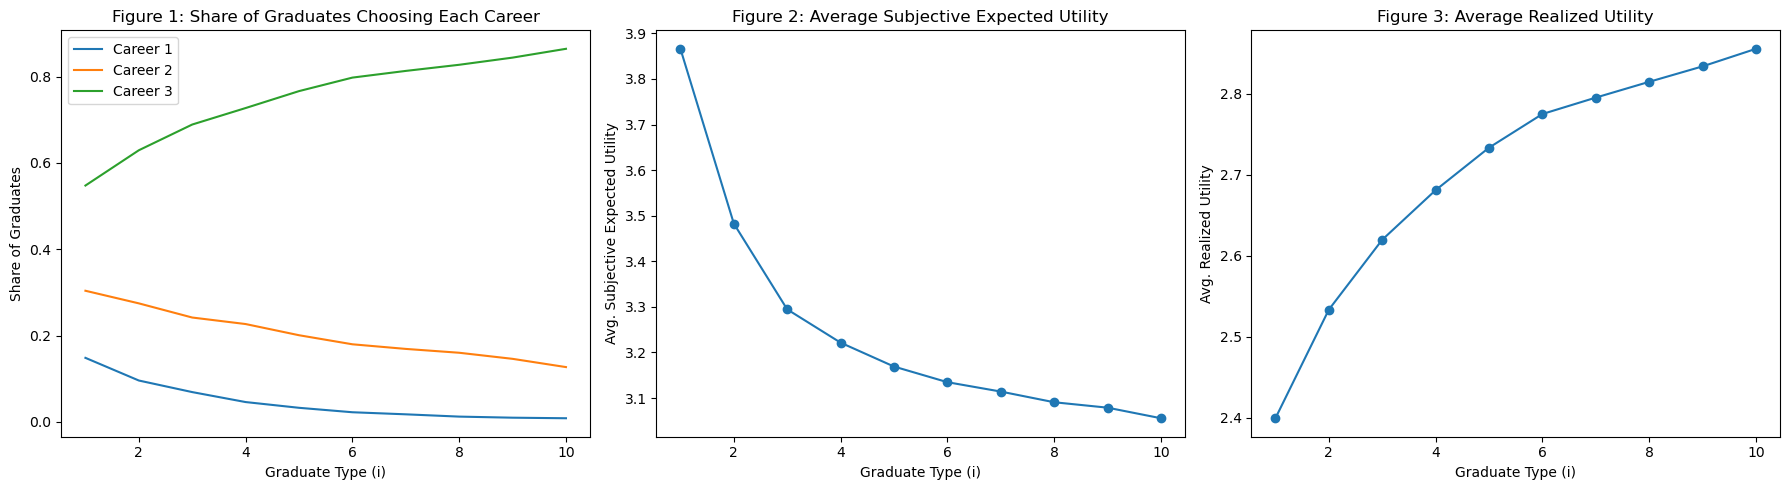

In [8]:
from examproject import simulate_career_choices

# Assuming simulate_career_choices() returns share_graduates, avg_subjective_util, avg_realized_util
share_graduates, avg_subjective_util, avg_realized_util = simulate_career_choices()

# Visualize the results
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Share of graduates choosing each career
for j in range(3):
    ax[0].plot(range(1, 11), share_graduates[:, j], label=f'Career {j+1}')
ax[0].set_xlabel('Graduate Type (i)')
ax[0].set_ylabel('Share of Graduates')
ax[0].set_title('Figure 1: Share of Graduates Choosing Each Career')
ax[0].legend()

# Average subjective expected utility
ax[1].plot(range(1, 11), avg_subjective_util, marker='o')
ax[1].set_xlabel('Graduate Type (i)')
ax[1].set_ylabel('Avg. Subjective Expected Utility')
ax[1].set_title('Figure 2: Average Subjective Expected Utility')

# Average realized utility
ax[2].plot(range(1, 11), avg_realized_util, marker='o')
ax[2].set_xlabel('Graduate Type (i)')
ax[2].set_ylabel('Avg. Realized Utility')
ax[2].set_title('Figure 3: Average Realized Utility')

plt.tight_layout()
plt.show()


#### Conclusion to Problem 2 - Question 2

In figure 1, shares of graduates choosing each career, we see that as graduates type i goes towards 10 then they are more likely to choose career j=3, as that is the career that has the highest expected utility and with more friends to observe and to base their career decision on, the more likely they are to choose the "correct" career which nets an average utility of 3.

In figure 2, average subjective expected utility, we see that as graduate type i goes towards 10, they are less likely to expect higher utility. This is because as i=10 has 10 times more friends to base their expected utility on than i=1, which means they observe a more "realistic" picture of utility they can expect. And as i goes towards infinity the expected utility goes towards three, which is the expected utility of career 3.

In figure 3, we see that the average realized utility increases as graduate type i goes towards 10, as they are more likely to pick a "correct" career that gives utility of 3. This is because they have more friends to base their decision on and i=10 have 10 friends in all three careers so they are most likely to pick career 3 which increases their average realizied utility.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

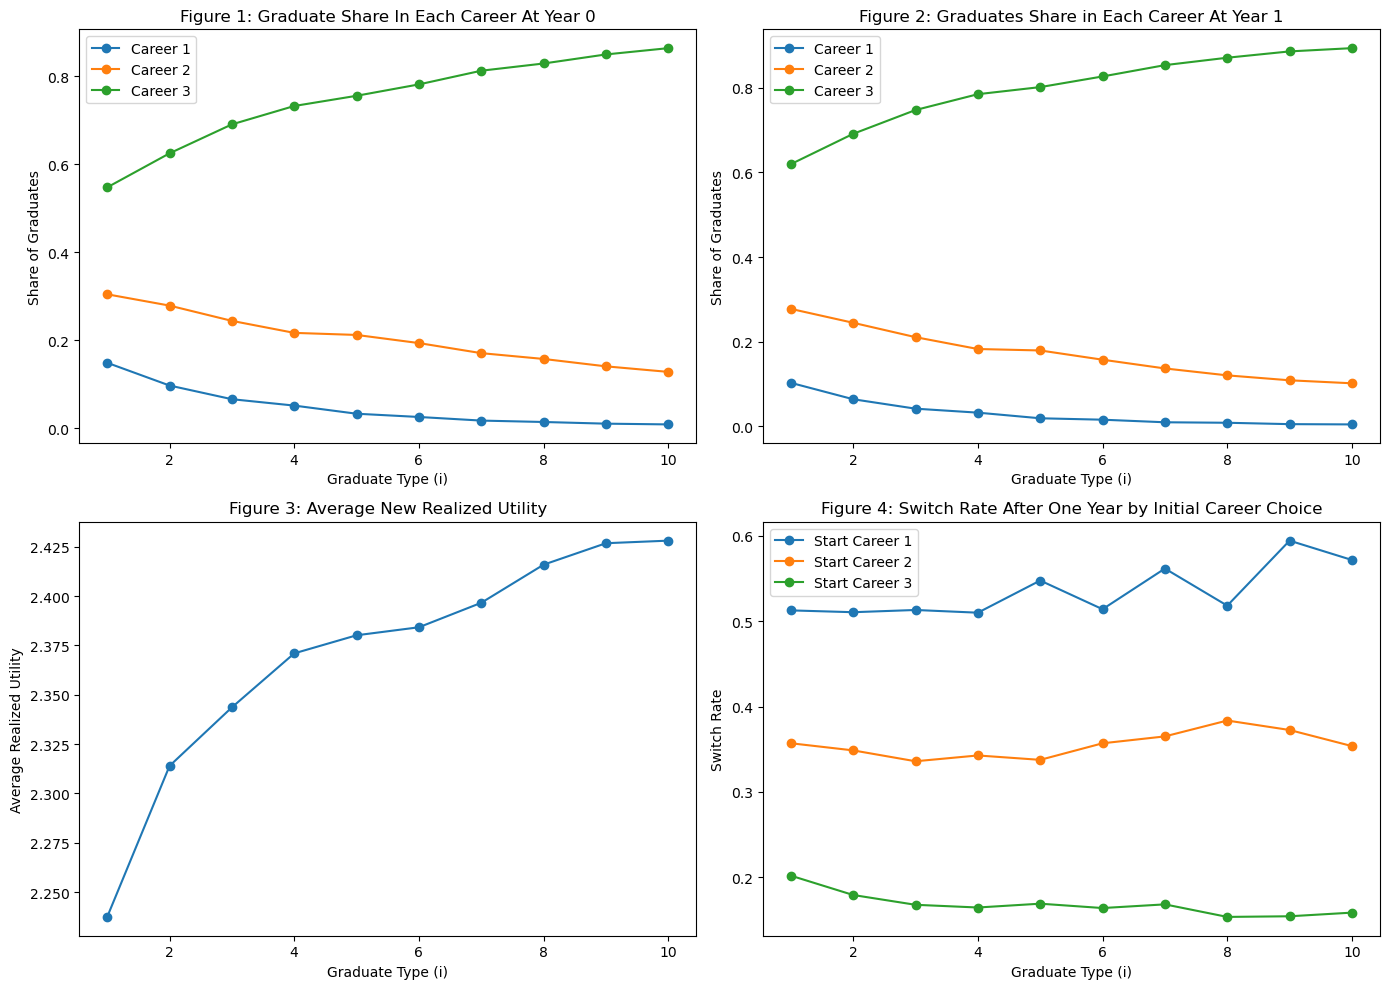

In [9]:
from examproject import simulate_career_choices_with_switch

# Run the simulation
share_graduates, average_subjective_utility, average_realized_utility, average_new_realized_utility, switch_rates, final_graduate_counts = simulate_career_choices_with_switch()

# Visualize the results
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Share of graduates choosing each career
for j in range(3):
    ax[0, 0].plot(range(1, 11), share_graduates[:, j], marker='o', label=f'Career {j+1}')
ax[0, 0].set_xlabel('Graduate Type (i)')
ax[0, 0].set_ylabel('Share of Graduates')
ax[0, 0].set_title('Figure 1: Graduate Share In Each Career At Year 0')
ax[0, 0].legend()

# Final graduate counts across careers
careers = ['Career 1', 'Career 2', 'Career 3']
for j in range(len(careers)):
    ax[0, 1].plot(range(1, 11), final_graduate_counts[:, j], marker='o', label=careers[j])
ax[0, 1].set_xlabel('Graduate Type (i)')
ax[0, 1].set_ylabel('Share of Graduates')
ax[0, 1].set_title('Figure 2: Graduates Share in Each Career At Year 1')
ax[0, 1].legend()

# Average realized utility
ax[1, 0].plot(range(1, 11), average_new_realized_utility, marker='o')
ax[1, 0].set_xlabel('Graduate Type (i)')
ax[1, 0].set_ylabel('Average Realized Utility')
ax[1, 0].set_title('Figure 3: Average New Realized Utility')

# Switch rates based on initial career choice
for j in range(3):
    ax[1, 1].plot(range(1, 11), switch_rates[:, j], marker='o', label=f'Start Career {j+1}')
ax[1, 1].set_xlabel('Graduate Type (i)')
ax[1, 1].set_ylabel('Switch Rate')
ax[1, 1].set_title('Figure 4: Switch Rate After One Year by Initial Career Choice')
ax[1, 1].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


#### Conclusion to Problem 2 - Question 3

In figure 1, we see the graduate share in chosen career at year 0 and with figure 2, shows the graduate share in chosen career after 1 year after they are allowed to change careers. We can clearly see that the share of graduates choosing career 3, the high utility career, is increasing compared to year 0, because they are allowed to change careers, knowing the utility of their current career. 

In figure 3, we see the new average realizied utility. We assume this is higher than in question 2 because people are allowed to change careers which would on average increase their net utility. The new average realizied utility is apparently lower than in question 2 compared to question 3 so the average net utility will be lower when allowing people to change careers. Either there is a calculations error or intuitivly, the reason could be that many graduates in career 2 and 3 mistakenly changes their careers to a lower utility career while incuring the change cost of c=1. This is backed up by figure 4 where we can see that even people in career 3 has a probability of mistakenly changing their career based on their friends utility of career 1 or 2.


In figure 4 we see how many in each career changes to a new career. Graduates in career 1, which is the lowest utility career, has of course the highest probability of changing their career to another one, after knowing the true utility of their career and with career 3 having the lowest probability.

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [10]:
# Generate random points:

# Set the random seed for reproductability:
rng = np.random.default_rng(2024)

# Generate (50) random points in the unit square X:
X = rng.uniform(size=(50,2))
# Define the target point y:
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

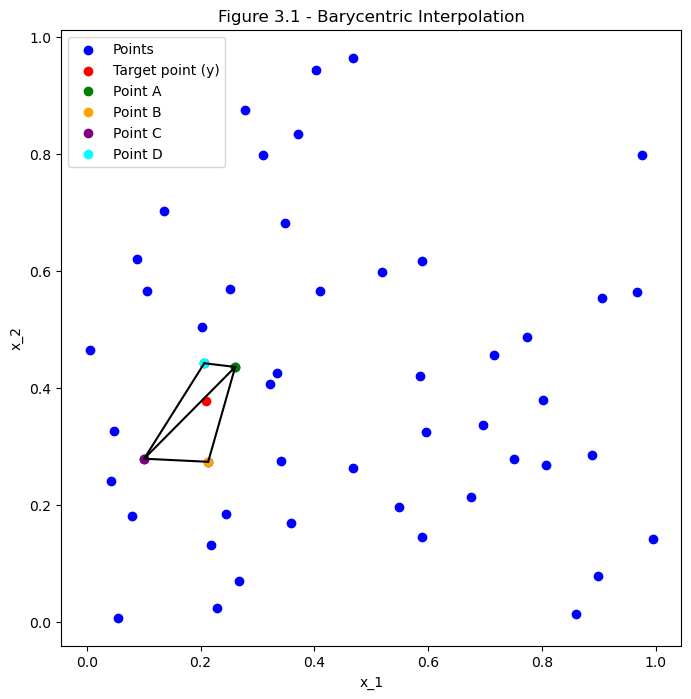

In [11]:
# We now define the points A,B,C and D.
# We use "np.linalg.norm(x - y)" as it is the same as writing the Euclidean distance between two points.
# So the Euclidean in the functions, we instead compute using numpy.
def points(X, y):
    A = min((x for x in X if x[0] > y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=np.array([np.nan, np.nan]))
    B = min((x for x in X if x[0] > y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=np.array([np.nan, np.nan]))
    C = min((x for x in X if x[0] < y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=np.array([np.nan, np.nan]))
    D = min((x for x in X if x[0] < y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=np.array([np.nan, np.nan]))
    return A, B, C, D

# We call the points that is now defined:
A, B, C, D = points(X, y)

# Plot the points and the triangles:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Points')
plt.scatter(*y, c='red', label='Target point (y)')
plt.scatter(*A, c='green', label='Point A')
plt.scatter(*B, c='orange', label='Point B')
plt.scatter(*C, c='purple', label='Point C')
plt.scatter(*D, c='cyan', label='Point D')

# Drawing triangles:
plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
plt.plot([C[0], A[0]], [C[1], A[1]], 'k-')
plt.plot([C[0], D[0]], [C[1], D[1]], 'k-')
plt.plot([D[0], A[0]], [D[1], A[1]], 'k-')

# Giving axis titles and figure header:
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend()
plt.title('Figure 3.1 - Barycentric Interpolation')
plt.show()

**Conclusion to question 3.1**\
From the figure 3.1 above, we can see the set of random points in the unit square (blue dots). We can also see point y (red dot) and the other colored dots representing the points A, B, C and D that are the corners in the two triangles ABC and CDA. It is possible to see that point y is located within triangle ABC as will be calculated precisely in the next question.

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [12]:
# Now that we have defined the points we can define the Barycentric coordinates as per the question:
# (We define the denominator as to shorten the amount of code)
def barycentric_coordinates(A, B, C, y):
    denominator = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denominator
    r2 = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3

# The Barycentric coordinates of y wrt. the triangle ABC:
r1ABC, r2ABC, r3ABC = barycentric_coordinates(A, B, C, y)
print("Barycentric coordinates of point y wrt. triangle ABC:", r1ABC, r2ABC, r3ABC)
# The Barycentric coordinates of y wrt. the triangle CDA:
r1CDA, r2CDA, r3CDA = barycentric_coordinates(C, D, A, y)
print("Barycentric coordinates of point y wrt. triangle CDA:",r1CDA, r2CDA, r3CDA)

# Defining function that checks whether point y is in a given triangle:
def is_y_in_triangle(r1, r2, r3):
    return (0 <= r1 <= 1) and (0 <= r2 <= 1) and (0 <= r3 <= 1)

# Check which triangle contains y and compute the interpolated value
if is_y_in_triangle(r1ABC, r2ABC, r3ABC):
    print("Point y is located inside triangle ABC.")
elif is_y_in_triangle(r1CDA, r2CDA, r3CDA):
    print("Point y is located inside triangle CDA.")
else:
    print("Point y is outside both triangles." " The interpolated value is =", np.nan)

Barycentric coordinates of point y wrt. triangle ABC: 0.6286263152916166 0.06910145494351515 0.3022722297648682
Barycentric coordinates of point y wrt. triangle CDA: 0.3682598757102867 -0.13392661883334067 0.765666743123054
Point y is located inside triangle ABC.


**Conclusion to question 3.2:** The point y is located in the triangle ABC. 
\
\
As it can be seen the Barycentric coordinates for triangle CDA doesn't fulfill the conditions; r1CDA ∈ [0,1], r2CDA ∈ [0,1] and r3CDA ∈ [0,1] as r2CDA is negative. Therefore the point y can't be inside the triangle.
\
\
For the triangle ABC all coordinates are within the interval and therefore the point y is inside this triangle. This is also possible to see as we plottet the triangles and points in Question 1.

**Now consider the function:**
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [13]:
f = lambda x: x[0] * x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [14]:
# Prints the coordinate sets of our points A-D.
print("A =",A ,", B =",B ,", C =",C ,", D =",D)

# Calculates and shows the product of the coordinates for our points A-D.
# This is later used to calculate the interpolated values.
f_A = f(A)
f_B = f(B)
f_C = f(C)
f_D = f(D)
print("f_A =",f_A, ", f_B =", f_B, ", f_C =", f_C, ", f_D =", f_D)

# Prints the Barycentric coordinates for the two triangles. Again we conclude point y is inside ABC as later shown.
print(f"Barycentric coordinates for ABC: (r1ABC, r2ABC, r3ABC) = {r1ABC, r2ABC, r3ABC}")
print(f"Barycentric coordinates for CDA: (r1CDA, r2CDA, r3CDA) = {r1CDA, r2CDA, r3CDA}")

# Calculates which triangle the point y is inside and the interpolated value for which the point is inside.
if is_y_in_triangle(r1ABC, r2ABC, r3ABC):
    print("Point y is inside triangle ABC. " "Interpolated value =", r1ABC * f(A) + r2ABC * f(B) + r3ABC * f(C))
elif is_y_in_triangle(r1CDA, r2CDA, r3CDA):
    print("Point y is inside triangle CDA. " "Interpolated value =", r1CDA * f(C) + r2CDA * f(D) + r3CDA * f(A))
else:
    print("Point y is outside both triangles. " "Interpolated value =", np.nan)

# Compare with the true value
true_value = f(y)

# Print the results
print(f"True value: {true_value}")
print(f"Interpolated value is {(r1ABC * f(A) + r2ABC * f(B) + r3ABC * f(C)) - true_value} away from true value")

A = [0.26071605 0.43635845] , B = [0.21315735 0.274245  ] , C = [0.10056103 0.27951775] , D = [0.20634391 0.44272557]
f_A = 0.11376565288529383 , f_B = 0.05845733718785628 , f_C = 0.02810859299017685 , f_D = 0.09135372518431266
Barycentric coordinates for ABC: (r1ABC, r2ABC, r3ABC) = (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
Barycentric coordinates for CDA: (r1CDA, r2CDA, r3CDA) = (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
Point y is inside triangle ABC. Interpolated value = 0.08405201731052576
True value: 0.0789565216259594
Interpolated value is 0.005095495684566367 away from true value


**Conclusion 3.3** Using the algorithm we have computed the approximation of f(y) and found the interpolated value 0.084. The true value is 0.079.\
The interpolated value is thus 0.0051 higher than the true value.

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [15]:
# We have chanced the values for the coordinate set 4 i Y, as it is the same as coordinate set 2.
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.2,0.8),(0.5,0.5)]

PointA = [0.21315735 0.274245  ] PointB = [0.24520427 0.18478708] PointC = [0.07872553 0.18082381] PointD = [0.10056103 0.27951775]

Barycentric coordinates of point y wrt. triangle ABC: 0.1805466701524854 0.5826765149253863 0.23677681492212832
Barycentric coordinates of point y wrt. triangle CDA: 0.7507400810688765 -0.7794749222521683 1.028734841183292

Point y is inside triangle ABC. Interpolated value = 0.04032631372248057
True value: 0.04000000000000001
Interpolated value is 0.0003263137224805632 away from true value


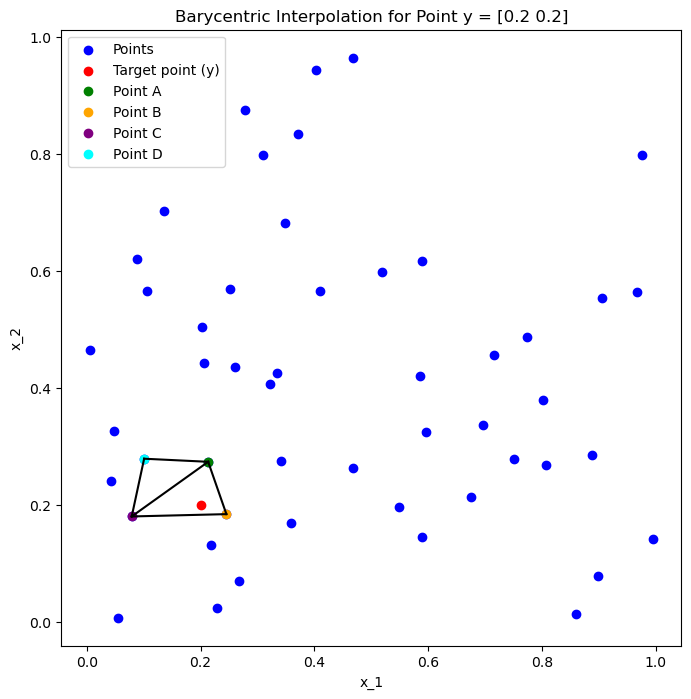

PointA = [0.80718199 0.26836533] PointB = [0.89822733 0.07903432] PointC = [0.58907501 0.14639442] PointD = [0.75116956 0.27987271]

Barycentric coordinates of point y wrt. triangle ABC: 0.5874166293573827 0.2678463596528006 0.14473701098981667
Barycentric coordinates of point y wrt. triangle CDA: 0.4187612872222544 -1.5023945927888533 2.083633305566599

Point y is inside triangle ABC. Interpolated value = 0.15874233999349835
True value: 0.16000000000000003
Interpolated value is -0.0012576600065016819 away from true value


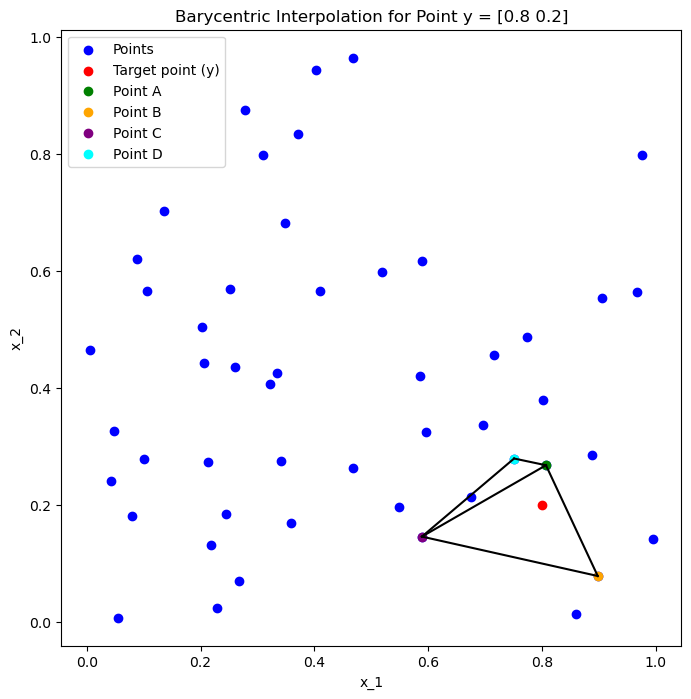

PointA = [nan nan] PointB = [0.9756222  0.79942844] PointC = [0.58875932 0.61680751] PointD = [0.46801905 0.96493021]

Barycentric coordinates of point y wrt. triangle ABC: nan nan nan
Barycentric coordinates of point y wrt. triangle CDA: nan nan nan

Point y is outside both triangles. Interpolated value = nan
True value: 0.6400000000000001
Interpolated value is nan away from true value


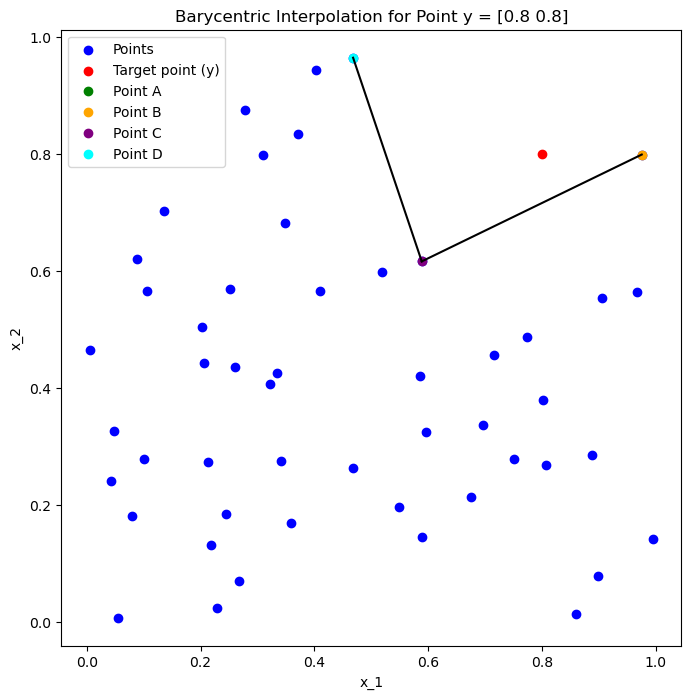

PointA = [0.2780414  0.87495784] PointB = [0.30945203 0.7994661 ] PointC = [0.13481886 0.70289116] PointD = [nan nan]

Barycentric coordinates of point y wrt. triangle ABC: 0.6575608315383328 -0.16604171793168665 0.5084808863933539
Barycentric coordinates of point y wrt. triangle CDA: nan nan nan

Point y is outside both triangles. Interpolated value = nan
True value: 0.16000000000000003
Interpolated value is 0.007074825739617985 away from true value


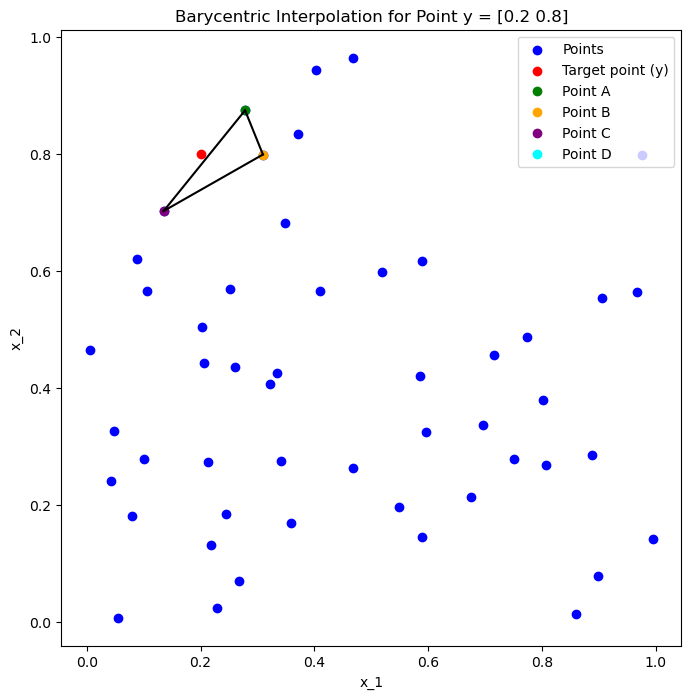

PointA = [0.51893133 0.59845416] PointB = [0.58538723 0.42030016] PointC = [0.33385622 0.42559779] PointD = [0.40981568 0.56582111]

Barycentric coordinates of point y wrt. triangle ABC: 0.4407329133559943 0.3362411978710884 0.2230258887729173
Barycentric coordinates of point y wrt. triangle CDA: 0.7896805544065844 -1.1659086695972625 1.3762281151906781

Point y is inside triangle ABC. Interpolated value = 0.2512901561119622
True value: 0.25
Interpolated value is 0.001290156111962204 away from true value


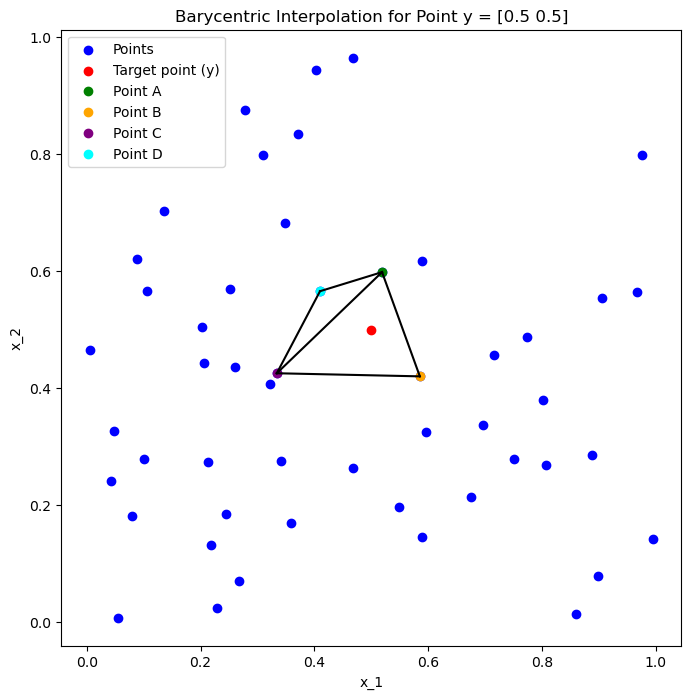

In [16]:
Y = np.array([(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.2, 0.8), (0.5, 0.5)])

for idx, y in enumerate(Y):
    A, B, C, D = points(X, y)
    print("PointA =", A, "PointB =", B, "PointC =",C, "PointD =",D)
    print()

    # The Barycentric coordinates of y wrt. the triangle ABC:
    r1ABC, r2ABC, r3ABC = barycentric_coordinates(A, B, C, y)
    print("Barycentric coordinates of point y wrt. triangle ABC:", r1ABC, r2ABC, r3ABC)
    # The Barycentric coordinates of y wrt. the triangle CDA:
    r1CDA, r2CDA, r3CDA = barycentric_coordinates(C, D, A, y)
    print("Barycentric coordinates of point y wrt. triangle CDA:",r1CDA, r2CDA, r3CDA)
    print()
    
    # Calculates which triangle the point y is inside and the interpolated value for which the point is inside.
    if is_y_in_triangle(r1ABC, r2ABC, r3ABC):
        print("Point y is inside triangle ABC. " "Interpolated value =", r1ABC * f(A) + r2ABC * f(B) + r3ABC * f(C))
    elif is_y_in_triangle(r1CDA, r2CDA, r3CDA):
        print("Point y is inside triangle CDA. " "Interpolated value =", r1CDA * f(C) + r2CDA * f(D) + r3CDA * f(A))
    else:
        print("Point y is outside both triangles. " "Interpolated value =", np.nan)

    # Compare with the true value
    true_value = f(y)

    # Print the results
    print(f"True value: {true_value}")
    print(f"Interpolated value is {(r1ABC * f(A) + r2ABC * f(B) + r3ABC * f(C)) - true_value} away from true value")

    # Plot the points and the triangles:
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c='blue', label='Points')
    plt.scatter(*y, c='red', label='Target point (y)')
    plt.scatter(*A, c='green', label='Point A')
    plt.scatter(*B, c='orange', label='Point B')
    plt.scatter(*C, c='purple', label='Point C')
    plt.scatter(*D, c='cyan', label='Point D')

    # Drawing triangles:
    plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
    plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
    plt.plot([C[0], A[0]], [C[1], A[1]], 'k-')
    plt.plot([C[0], D[0]], [C[1], D[1]], 'k-')
    plt.plot([D[0], A[0]], [D[1], A[1]], 'k-')

    # Giving axis titles and figure header:
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend()
    plt.title(f'Barycentric Interpolation for Point y = {y}')
    plt.show()